In [4]:
# LIBRARY INSTALLATION
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip
!pip install -q pyproj==1.9.6

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     - 133.1 MB 140.4 MB/s
     |████████████████████████████████| 6.6 MB 5.0 MB/s 
     |████████████████████████████████| 219 kB 49.4 MB/s 
     |████████████████████████████████| 2.8 MB 5.1 MB/s 


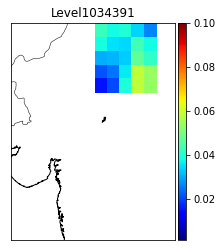

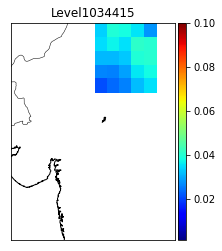

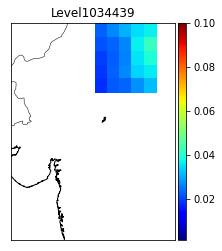

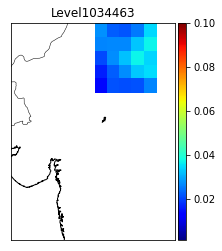

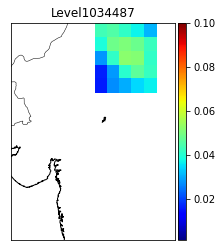

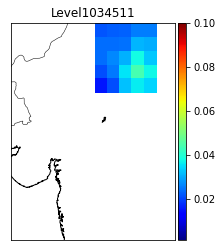

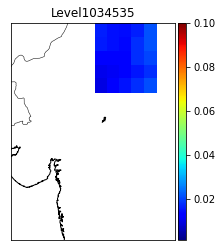

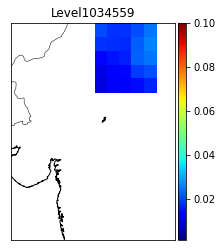

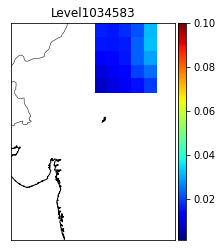

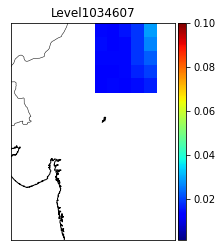

In [20]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import PIL
# data load
data = Dataset('/content/drive/MyDrive/Sharing/latest.nc')
ds=xr.open_dataset('/content/drive/MyDrive/Sharing Caring/latest.nc')
lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]
time = data.variables['time'][:]
tcco = data.variables['tcco'][:]
bcoad550 = data.variables['bcaod550'][:]
tcso2 = data.variables['tcso2'][:]
#plot in selected area to cover northern part of india using basemap
mp = Basemap(projection = 'merc', llcrnrlon=69.852644,llcrnrlat=17.644022,urcrnrlon=79.872293,urcrnrlat=29.764377,resolution='i')
lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)
frame = []
days = np.arange(0,10)
for i in days:
  c_sc= mp.pcolor(x,y,np.squeeze(bcoad550[i,:,:]), cmap = 'jet')
  mp.drawcoastlines()
  mp.drawstates()
  mp.drawcountries()
  cbar = mp.colorbar(c_sc, location='right')
  day = i + 1
  plt.title('Level'+ str(time[i]))
  plt.clim(0.001,0.1)
  plt.show()
  # new_frame = PIL.
  # frame.append(new_frame)

# frame[0].save('giffy.gif', format = 'GIF', append_images = frame[1:], save_all = True, duration = 100, loop = 0)

In [5]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import PIL
import datetime
import xarray as xr
# data = Dataset('/content/drive/MyDrive/Sharing/latest.nc')
data=xr.open_dataset('/content/drive/MyDrive/Sharing/ozone_march.nc')

lats = data['latitude'][:]
lons = data['longitude'][:]

# datetimeindex = data.indexes['time'].to_datetimeindex()
# data['time'] = datetimeindex
time = data.variables['time'][:]
# tcco = data.variables['tcco'][:]
# bcoad550 = data.variables['bcaod550'][:]
# tcso2 = data.variables['tcso2'][:]

# gtco3 = data.variables['gtco3'][:]

pm2p5 = data.variables['pm2p5'][:]

mp = Basemap(projection = 'merc', llcrnrlon=69.852644,llcrnrlat=17.644022,urcrnrlon=90.872293,urcrnrlat=34.764377,resolution='i')
lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)
frame = []
days = np.arange(0,365)
for i in days:
  c_sc= mp.pcolor(x,y,np.squeeze(pm2p5[i,:,:]), cmap = 'jet')
  mp.drawcoastlines()
  mp.drawstates()
  mp.drawcountries()
  cbar = mp.colorbar(c_sc, location='right')
  day = i + 1
  plt.title('Level'+ str(data.time.dt.date[i]))
  # plt.clim(0.0001,0.009)
  # plt.show()
  plt.savefig('/content/drive/MyDrive/Sharing/'+str(i)+'.jpg')
  plt.clf()
  # frame.append(new_frame)

# frame[0].save('giffy.gif', format = 'GIF', append_images = frame[1:], save_all = True, duration = 100, loop = 0)

<Figure size 432x288 with 0 Axes>

In [6]:
import PIL
import numpy as np
image_frames = []
days = np.arange(1,365)

for k in days:
  if k % 3 == 0:
    new_frame = PIL.Image.open(r'/content/drive/MyDrive/Sharing/'+str(k)+'.jpg')
    image_frames.append(new_frame)

image_frames[0].save('/content/drive/MyDrive/Sharing Caring/ozone_March.gif', format = 'GIF', append_images = image_frames[1:], save_all=True, duration = 300, loop = 0)

In [3]:
import xarray as xr
data=xr.open_dataset('/content/drive/MyDrive/Sharing Caring/delhi_air_2019.nc')
data

<xarray.Dataset>
Dimensions:    (latitude: 6, longitude: 6, time: 365)
Coordinates:
  * longitude  (longitude) float32 75.0 75.75 76.5 77.25 78.0 78.75
  * latitude   (latitude) float32 29.75 29.0 28.25 27.5 26.75 26.0
  * time       (time) datetime64[ns] 2019-01-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    pm2p5      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-10 10:00:37 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

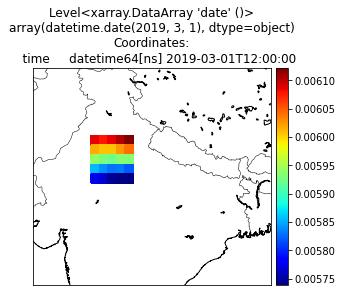

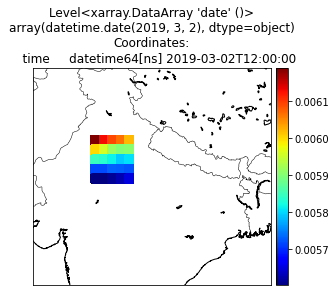

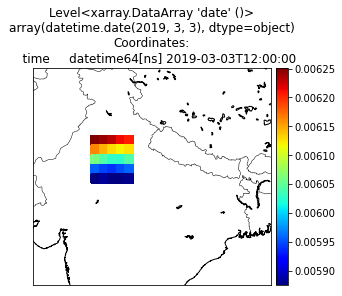

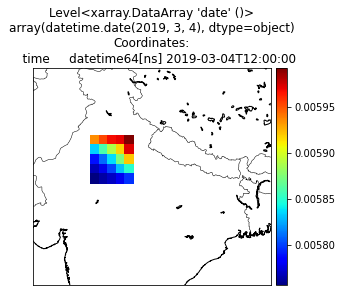

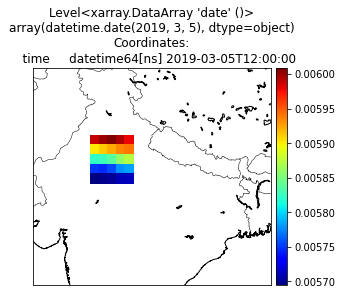

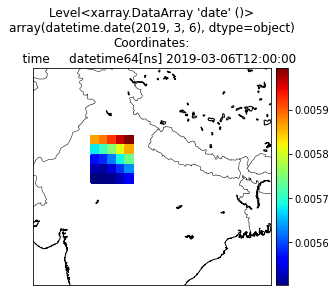

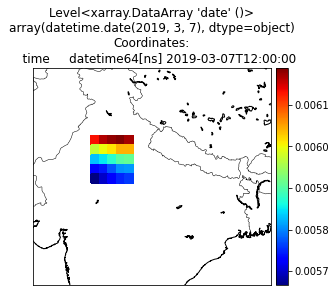

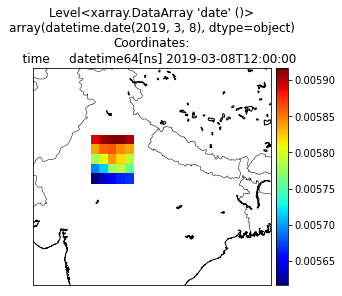

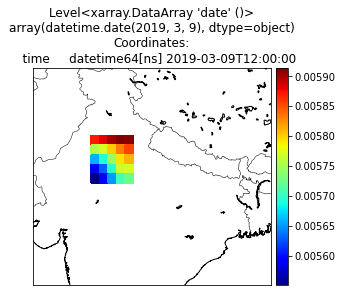

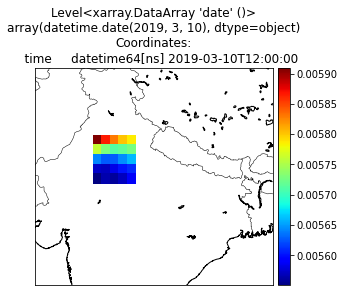

In [12]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import PIL
import datetime
import xarray as xr
# data = Dataset('/content/drive/MyDrive/Sharing Caring/latest.nc')
data=xr.open_dataset('/content/drive/MyDrive/Sharing/ozone2019.nc')

lats = data['latitude'][:]
lons = data['longitude'][:]

time = data.variables['time'][:]

gtco3 = data.variables['gtco3'][:]

mp = Basemap(projection = 'merc', llcrnrlon=69.852644,llcrnrlat=17.644022,urcrnrlon=90.872293,urcrnrlat=34.764377,resolution='i')
lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)
frame = []
days = np.arange(0,10)
for i in days:
  c_sc= mp.pcolor(x,y,np.squeeze(gtco3[i,:,:]), cmap = 'jet')
  mp.drawcoastlines()
  mp.drawstates()
  mp.drawcountries()
  cbar = mp.colorbar(c_sc, location='right')
  day = i + 1
  plt.title('Level'+ str(data.time.dt.date[i]))
  # plt.clim(0.0001,0.009)
  plt.show()
  # plt.savefig('/content/drive/MyDrive/Sharing Caring/'+str(i)+'.jpg')
  # plt.clf()

In [2]:
import xarray as xr
data=xr.open_dataset('/content/drive/MyDrive/Sharing/ozone2019.nc')
data

<xarray.Dataset>
Dimensions:    (latitude: 6, longitude: 6, time: 92)
Coordinates:
  * longitude  (longitude) float32 75.0 75.75 76.5 77.25 78.0 78.75
  * latitude   (latitude) float32 29.75 29.0 28.25 27.5 26.75 26.0
  * time       (time) datetime64[ns] 2019-03-01T12:00:00 ... 2019-05-31T12:00:00
Data variables:
    gtco3      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-08-10 18:06:55 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...